<a href="https://colab.research.google.com/github/leminhquoc248/AI_code/blob/main/iden_money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [3]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/MONEY-TIỀN/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 330 images belonging to 11 classes.


In [4]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/MONEY-TIỀN/Test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 220 images belonging to 11 classes.


In [5]:
training_set.class_indices

{'100k': 0,
 '10k': 1,
 '1k': 2,
 '200': 3,
 '200k': 4,
 '20k': 5,
 '2k': 6,
 '500': 7,
 '500k': 8,
 '50k': 9,
 '5k': 10}

In [11]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [7]:
opt=SGD(lr=0.01,momentum=0.9)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [13]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
history=model.fit(training_set,epochs=100,batch_size=10,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)]) # verbose=1 để hiển thị quá trinh học

Epoch 1/100
11/11 [==============================] - 118s 11s/step - loss: 7.9581 - accuracy: 0.0939 - val_loss: 2.4005 - val_accuracy: 0.0909
Epoch 2/100
11/11 [==============================] - 13s 1s/step - loss: 2.4016 - accuracy: 0.0970 - val_loss: 2.3888 - val_accuracy: 0.1091
Epoch 3/100
11/11 [==============================] - 13s 1s/step - loss: 2.3907 - accuracy: 0.0970 - val_loss: 2.3644 - val_accuracy: 0.0864
Epoch 4/100
11/11 [==============================] - 13s 1s/step - loss: 2.3422 - accuracy: 0.1242 - val_loss: 2.2800 - val_accuracy: 0.2136
Epoch 5/100
11/11 [==============================] - 13s 1s/step - loss: 2.2816 - accuracy: 0.1667 - val_loss: 2.1800 - val_accuracy: 0.2909
Epoch 6/100
11/11 [==============================] - 13s 1s/step - loss: 2.1755 - accuracy: 0.2515 - val_loss: 2.1247 - val_accuracy: 0.2591
Epoch 7/100
11/11 [==============================] - 14s 1s/step - loss: 2.1678 - accuracy: 0.2333 - val_loss: 1.9571 - val_accuracy: 0.3364
Epoch 8/100

In [15]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.055023688822984695
Train Accuracy 0.9666666388511658


<function matplotlib.pyplot.show>

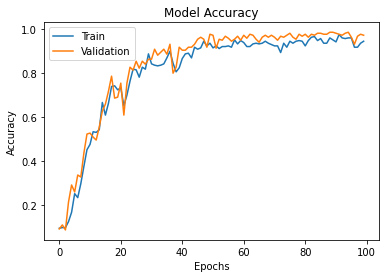

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [17]:
model.save("Final.h5")
model_CNN=load_model('Final.h5')

100k


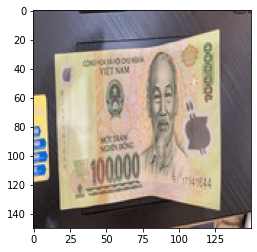

In [18]:
img=load_img('/content/drive/MyDrive/MONEY-TIỀN/Test/100k/100k (1).jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='100k'
elif round(result[0][1])==1:
  prediction='10k'
elif round(result[0][2])==1:
  prediction='1k'
elif round(result[0][3])==1:
  prediction='200'  
elif round(result[0][4])==1:
  prediction='200k'
elif round(result[0][5])==1:
  prediction='20k'
elif round(result[0][6])==1:
  prediction='2k'
elif round(result[0][7])==1:
  prediction='500'
elif round(result[0][8])==1:
  prediction='500k'
elif round(result[0][9])==1:
  prediction='50k'  
elif round(result[0][9])==1:
  prediction='5k'  
print(prediction)

2k


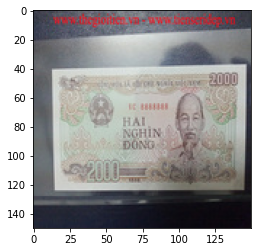

In [19]:
img=load_img('/content/drive/MyDrive/MONEY-TIỀN/Test/2k/20140424_185520.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='100k'
elif round(result[0][1])==1:
  prediction='10k'
elif round(result[0][2])==1:
  prediction='1k'
elif round(result[0][3])==1:
  prediction='200'  
elif round(result[0][4])==1:
  prediction='200k'
elif round(result[0][5])==1:
  prediction='20k'
elif round(result[0][6])==1:
  prediction='2k'
elif round(result[0][7])==1:
  prediction='500'
elif round(result[0][8])==1:
  prediction='500k'
elif round(result[0][9])==1:
  prediction='50k'  
elif round(result[0][9])==1:
  prediction='5k'  
print(prediction)

500k


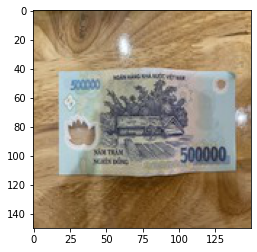

In [21]:
img=load_img('/content/drive/MyDrive/MONEY-TIỀN/Test/500k/z3424230799570_59c12f8372b865a8aa90e012ecb5752f.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='100k'
elif round(result[0][1])==1:
  prediction='10k'
elif round(result[0][2])==1:
  prediction='1k'
elif round(result[0][3])==1:
  prediction='200'  
elif round(result[0][4])==1:
  prediction='200k'
elif round(result[0][5])==1:
  prediction='20k'
elif round(result[0][6])==1:
  prediction='2k'
elif round(result[0][7])==1:
  prediction='500'
elif round(result[0][8])==1:
  prediction='500k'
elif round(result[0][9])==1:
  prediction='50k'  
elif round(result[0][9])==1:
  prediction='5k'  
print(prediction)